# Customer Shopping Trends

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib.ticker import FuncFormatter, MaxNLocator

In [3]:
shop = pd.read_csv(
    r'C:\Users\mtorr\Documents\Coding-Temple\6-Module\Assignments\M6-Project-Independent-Exploration\data\shopping_trends.csv'
)


# First look at Data

In [4]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
shop.shape

(3900, 19)

In [6]:
shop.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [7]:
shop.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [8]:
shop.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
shop.describe(include = 'O')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


# Exploring Data

In [10]:
# make every column lowercase
shop.columns = shop.columns.str.lower()

In [11]:
shop

,customer id,age,gender,item purchased,category,purchase amount (usd),location,size,color,season,review rating,subscription status,payment method,shipping type,discount applied,promo code used,previous purchases,preferred payment method,frequency of purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [12]:
shop.shape

(3900, 19)

In [13]:
# whats the ratio of male and female
shop['gender'].value_counts(normalize = True)

gender
Male      0.68
Female    0.32
Name: proportion, dtype: float64

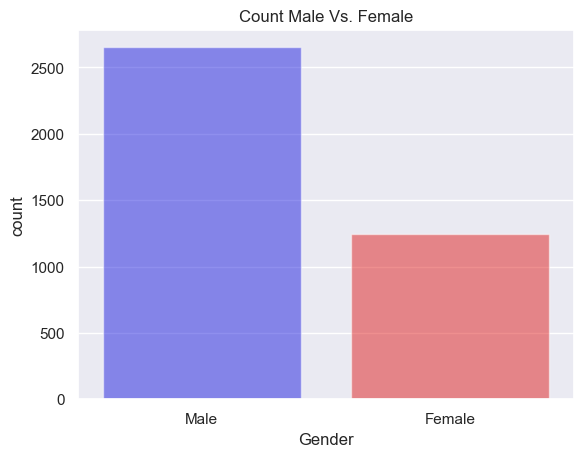

In [14]:
sns.set(style = 'darkgrid')

sns.countplot(data = shop,
              x = 'gender',
              hue = 'gender',
             palette = ['blue', 'red'],
             alpha = .5)

plt.title('Count Male Vs. Female')
plt.xlabel('Gender');

> This is showing that in this dataset there are more male than female

In [17]:
#see what season male or female purchased more in 
shop.groupby('gender')['season'].value_counts()

gender  season
Female  Fall      328
        Spring    316
        Winter    306
        Summer    298
Male    Spring    683
        Winter    665
        Summer    657
        Fall      647
Name: count, dtype: int64

In [18]:
shop['season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

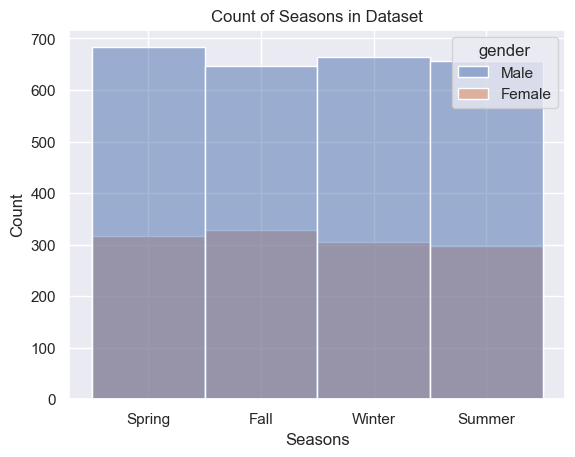

In [19]:
season_order = ['Spring', 'Fall', 'Winter', 'Summer']
shop['season'] = pd.Categorical(shop['season'], categories=season_order, ordered=True)

sns.histplot(data=shop, x='season', 
             discrete=True,
            color = 'green',
            hue = 'gender')
plt.title('Count of Seasons in Dataset')
plt.xlabel('Seasons');

>This shows spring being the hieghest time for purchases and as male showing the most about 683 of males

In [20]:
# add up purchase columns for each season
spring_shop = shop.loc[shop['season'] == 'Spring']
fall_shop = shop.loc[shop['season'] == 'Fall']
winter_shop = shop.loc[shop['season'] == 'Winter']
summer_shop = shop.loc[shop['season'] == 'Summer']

In [23]:
# top 5 items puchased for spring
spring_shop.groupby('gender')['item purchased'] \
    .value_counts() \
    .groupby(level=0) \
    .head(5)

gender  item purchased
Female  Sandals           23
        Sweater           19
        Blouse            17
        Boots             17
        Handbag           17
Male    Dress             33
        Gloves            33
        Shorts            33
        Sweater           33
        Scarf             32
Name: count, dtype: int64

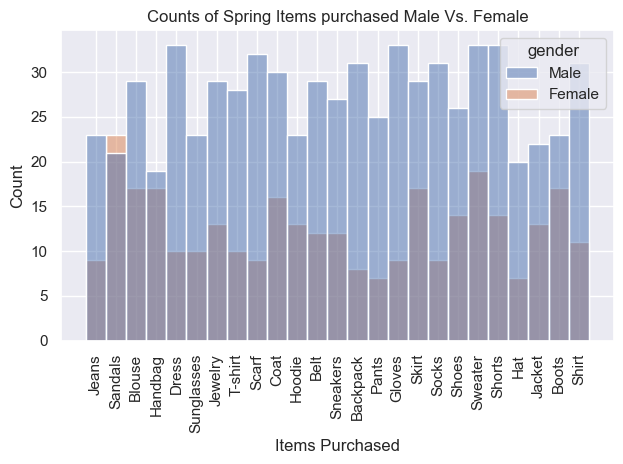

In [22]:
sns.histplot(data = spring_shop,
             x = 'item purchased',
            color = 'green',
            hue = 'gender')

plt.title('Counts of Spring Items purchased Male Vs. Female')
plt.xlabel('Items Purchased')
plt.xticks(rotation=90) 
plt.tight_layout()       
plt.show()

> This shows male purchases more in spring with the item being sweater as the most item with about 33 times

In [24]:
# top 5 for fall 
fall_shop.groupby('gender')['item purchased'] \
    .value_counts() \
    .groupby(level=0) \
    .head(5)

gender  item purchased
Female  Hat               22
        Socks             22
        Blouse            18
        Handbag           18
        Sandals           17
Male    Jacket            38
        Skirt             32
        Sweater           31
        Handbag           30
        Hat               28
Name: count, dtype: int64

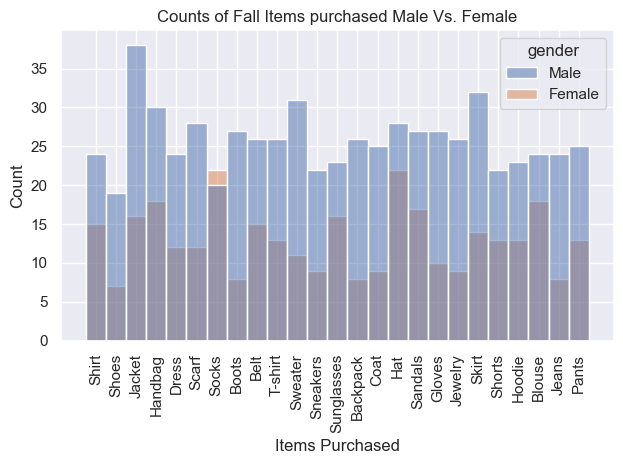

In [101]:
sns.histplot(data = fall_shop,
             x = 'item purchased',
            color = 'green',
            hue = 'gender')

plt.title('Counts of Fall Items purchased Male Vs. Female')
plt.xlabel('Items Purchased')
plt.xticks(rotation=90) 
plt.tight_layout()       
plt.show()

> This show male being the highest purchaser with the nuber one items being jacket in fall with 38 purcheses

In [25]:
winter_shop.groupby('gender')['item purchased'] \
    .value_counts() \
    .groupby(level=0) \
    .head(5)

gender  item purchased
Female  Shirt             21
        Sunglasses        19
        Jewelry           18
        Shoes             16
        Hat               15
Male    Pants             37
        Hoodie            33
        Sunglasses        33
        Coat              30
        Sneakers          30
Name: count, dtype: int64

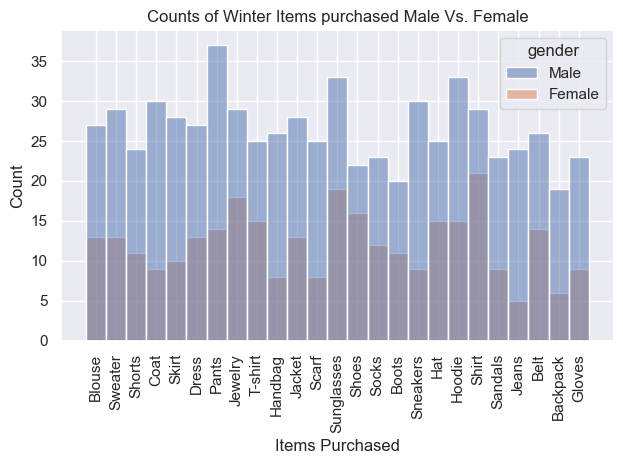

In [149]:
sns.histplot(data = winter_shop,
             x = 'item purchased',
            color = 'green',
            hue = 'gender')

plt.title('Counts of Winter Items purchased Male Vs. Female')
plt.xlabel('Items Purchased')
plt.xticks(rotation=90) 
plt.tight_layout()       
plt.show()

> This shows male being the highest purcheser in winter with pants being number one item with 37 purchases

In [26]:
summer_shop.groupby('gender')['item purchased'] \
    .value_counts() \
    .groupby(level=0) \
    .head(5)

gender  item purchased
Female  Blouse            18
        Dress             17
        Scarf             16
        Backpack          15
        Handbag           15
Male    Pants             36
        Jewelry           35
        Shoes             35
        Backpack          30
        Dress             30
Name: count, dtype: int64

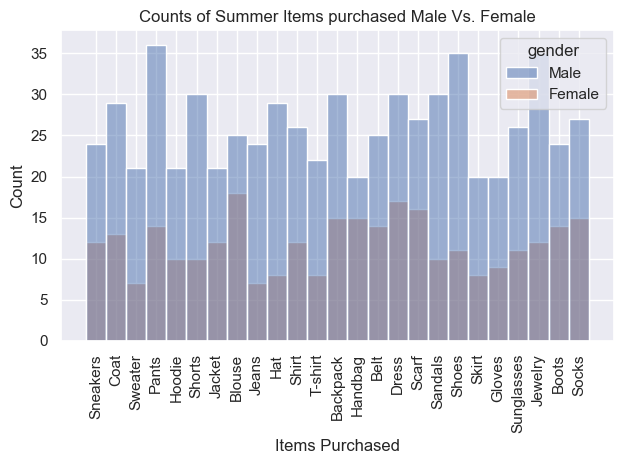

In [103]:
sns.histplot(data = summer_shop,
             x = 'item purchased',
            color = 'green',
            hue = 'gender')

plt.title('Counts of Summer Items purchased Male Vs. Female')
plt.xlabel('Items Purchased')
plt.xticks(rotation=90) 
plt.tight_layout()       
plt.show()

> This shows that male is the highest in summer with pants being the most item with 36 purchases

In [104]:
shop

,customer id,age,gender,item purchased,category,purchase amount (usd),location,size,color,season,review rating,subscription status,payment method,shipping type,discount applied,promo code used,previous purchases,preferred payment method,frequency of purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


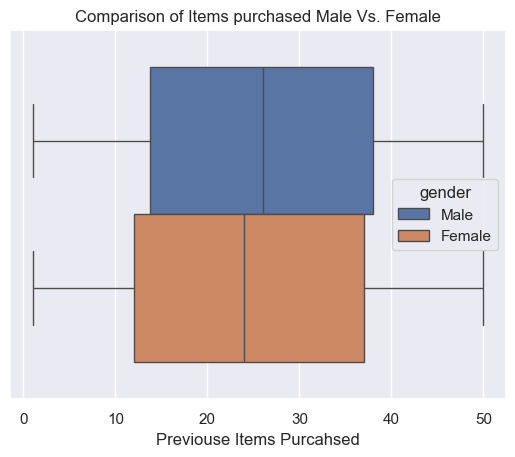

In [28]:
# Who Buys more items Male or Female
sns.boxplot(data = shop, 
            x = 'previous purchases',
           hue = 'gender')

plt.title('Comparison of Items purchased Male Vs. Female')
plt.xlabel('Previouse Items Purcahsed');

> This shows that male purchase more items overall in previous purchases

In [29]:
male_shop = shop.loc[shop['gender'] == 'Male']
female_shop = shop.loc[shop['gender'] == 'Female']

In [39]:
print("The male average items purchased", male_shop['previous purchases'].mean())
print("The female averag items purchased", female_shop['previous purchases'].mean())
print("The averge item differnce between male and female", male_shop['previous purchases'].mean() - female_shop['previous purchases'].mean())

The male average items purchased 25.707013574660632
The female averag items purchased 24.596153846153847
The averge item differnce between male and female 1.1108597285067852


In [31]:
print(male_shop['previous purchases'].sum())
print(female_shop['previous purchases'].sum())
print(male_shop['previous purchases'].sum() - female_shop['previous purchases'].sum())

68175
30696
37479


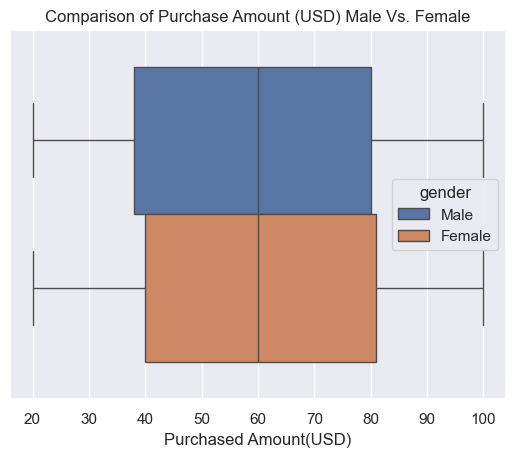

In [32]:
# Who spends more male or female
sns.boxplot(data = shop, 
            x = 'purchase amount (usd)',
           hue = 'gender')

plt.title('Comparison of Purchase Amount (USD) Male Vs. Female')
plt.xlabel('Purchased Amount(USD)');

> This is showing that Female spend slightly more on items than male about 0.7% more on average

In [40]:
print("The average spending per item for male", male_shop['purchase amount (usd)'].mean())
print("The average spending per item for female", female_shop['purchase amount (usd)'].mean())
print("The difference in spending on average per item for male and female", female_shop['purchase amount (usd)'].mean() - male_shop['purchase amount (usd)'].mean())

The average spending per item for male 59.536199095022624
The average spending per item for female 60.249198717948715
The difference in spending on average per item for male and female 0.7129996229260911


In [168]:
# Who spent the most in total
print(male_shop['purchase amount (usd)'].sum())
print(female_shop['purchase amount (usd)'].sum())
print(male_shop['purchase amount (usd)'].sum() - female_shop['purchase amount (usd)'].sum())

157890
75191
82699


- what season has the most purchases
- what item was that in the season and did male or female buy more
- is male or female the highest purchaser in number of items and in spending amount
- are there more female than male